In [10]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/group_1_crimes_100m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/group_1_crimes_100m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='group_1_crimes_100m'

In [11]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [12]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                             Assault-Related Crime Incidents Within 100m, Oct. 2022   
                                                 \emph{Independent Variable}                                                                          
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_1_crimes_100m                                              6.143159e-76       
                                                 pre_treatment_change_in_group_1_crimes_100m                                       2.473745e-12       
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                                5.482581e-08       
                                                 job_density_2013                                                                  5.761430e-27       
                                                 med_hhinc2016                                                                     9.474676e-02       
                                                 poor_share2010                                                                    3.407828e-03       
                                                 popdensity2010                                                                    2.500550e-02       
                                                 rent_twobed2015                                                                   4.322571e-18       
                                                 traveltime15_2010                                                                 1.013900e-17       
Panel C: Case Initiation                         for_cause                                                                         1.498872e-01       
                                                 no_cause                                                                          3.431701e-01       
                                                 non_payment                                                                       5.125081e-02       
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                                          1.522413e-01       
                                                 hasAttyP                                                                          5.353570e-01       
                                                 isEntityD                                                                         1.390084e-01       
                                                 isEntityP                                                                         1.677240e-02       

                                                                                                                
                                                                                             Plaintiff Victory  
                                                 \emph{Independent Variable}                                    
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_1_crimes_100m             7.422839e-03  
                                                 pre_treatment_change_in_group_1_crimes_100m      5.556819e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                               7.782860e-01  
                                                 job_density_2013                                 5.178933e-01  
                                                 med_hhinc2016                                    1.224981e-01  
                                                 poor_share2010                                   5.297634e-01  
                                                 popdensity2010                                   6.607443e-03  
                                                 rent_twobed2015                                  1.099251e-02  
                

In [13]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                                    Cases Won by Plaintiff   
Panel A twenty_seventeen_group_1_crimes_100m                      0.414481   
        pre_treatment_change_in_group_1_crimes_100m               0.036726   
Panel B frac_coll_plus2010                                        0.322882   
        job_density_2013                                      16069.137185   
        poor_share2010                                            0.273292   
        popdensity2010                                        23086.043553   
        rent_twobed2015                                        1339.985876   
        traveltime15_2010                                         0.162315   
Panel D isEntityP                                                 0.808499   

                                                    Difference in Cases Won by Defendant  \
                                                                              Unweighted   
Panel A twenty_seventeen_group_1_crimes_100m                                    0.069899   
        pre_treatment_change_in_group_1_crimes_100m                            -0.020380   
Panel B frac_coll_plus2010                                                      0.002115   
        job_density_2013                                                      926.908698   
        poor_share2010                                                         -0.003079   
        popdensity2010                                                       1225.145069   
        rent_twobed2015                                                       -73.788772   
        traveltime15_2010                                                      -0.008164   
Panel D isEntityP                                                              -0.064959   

                                                                   \
                                                         \emph{p}   
Panel A twenty_seventeen_group_1_crimes_100m         7.422839e-03   
        pre_treatment_change_in_group_1_crimes_100m  5.556819e-01   
Panel B frac_coll_plus2010                           7.782860e-01   
        job_density_2013                             5.178933e-01   
        poor_share2010                               5.297634e-01   
        popdensity2010                               6.607443e-03   
        rent_twobed2015                              1.099251e-02   
        traveltime15_2010                            1.120931e-02   
Panel D isEntityP                                    2.625077e-07   

                                                                            
                                                        Weighted  \emph{p}  
Panel A twenty_seventeen_group_1_crimes_100m            0.030258  0.453768  
        pre_treatment_change_in_group_1_crimes_100m     0.008866  0.867213  
Panel B frac_coll_plus2010                              0.025332  0.016873  
        job_density_2013                             1906.773247  0.358450  
        poor_share2010                                 -0.034296  0.000003  
        popdensity2010                                -39.787628  0.953565  
        rent_twobed2015                               -48.831293  0.253648  
        traveltime15_2010                              -0.017788  0.000273  
Panel D isEntityP                                      -0.062511  0.000575

In [14]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
missing_indicators = add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, missing_indicators, value_vars_crime, month_to_int_dictionary)

In [15]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:22<00:00, 95.13it/s] 


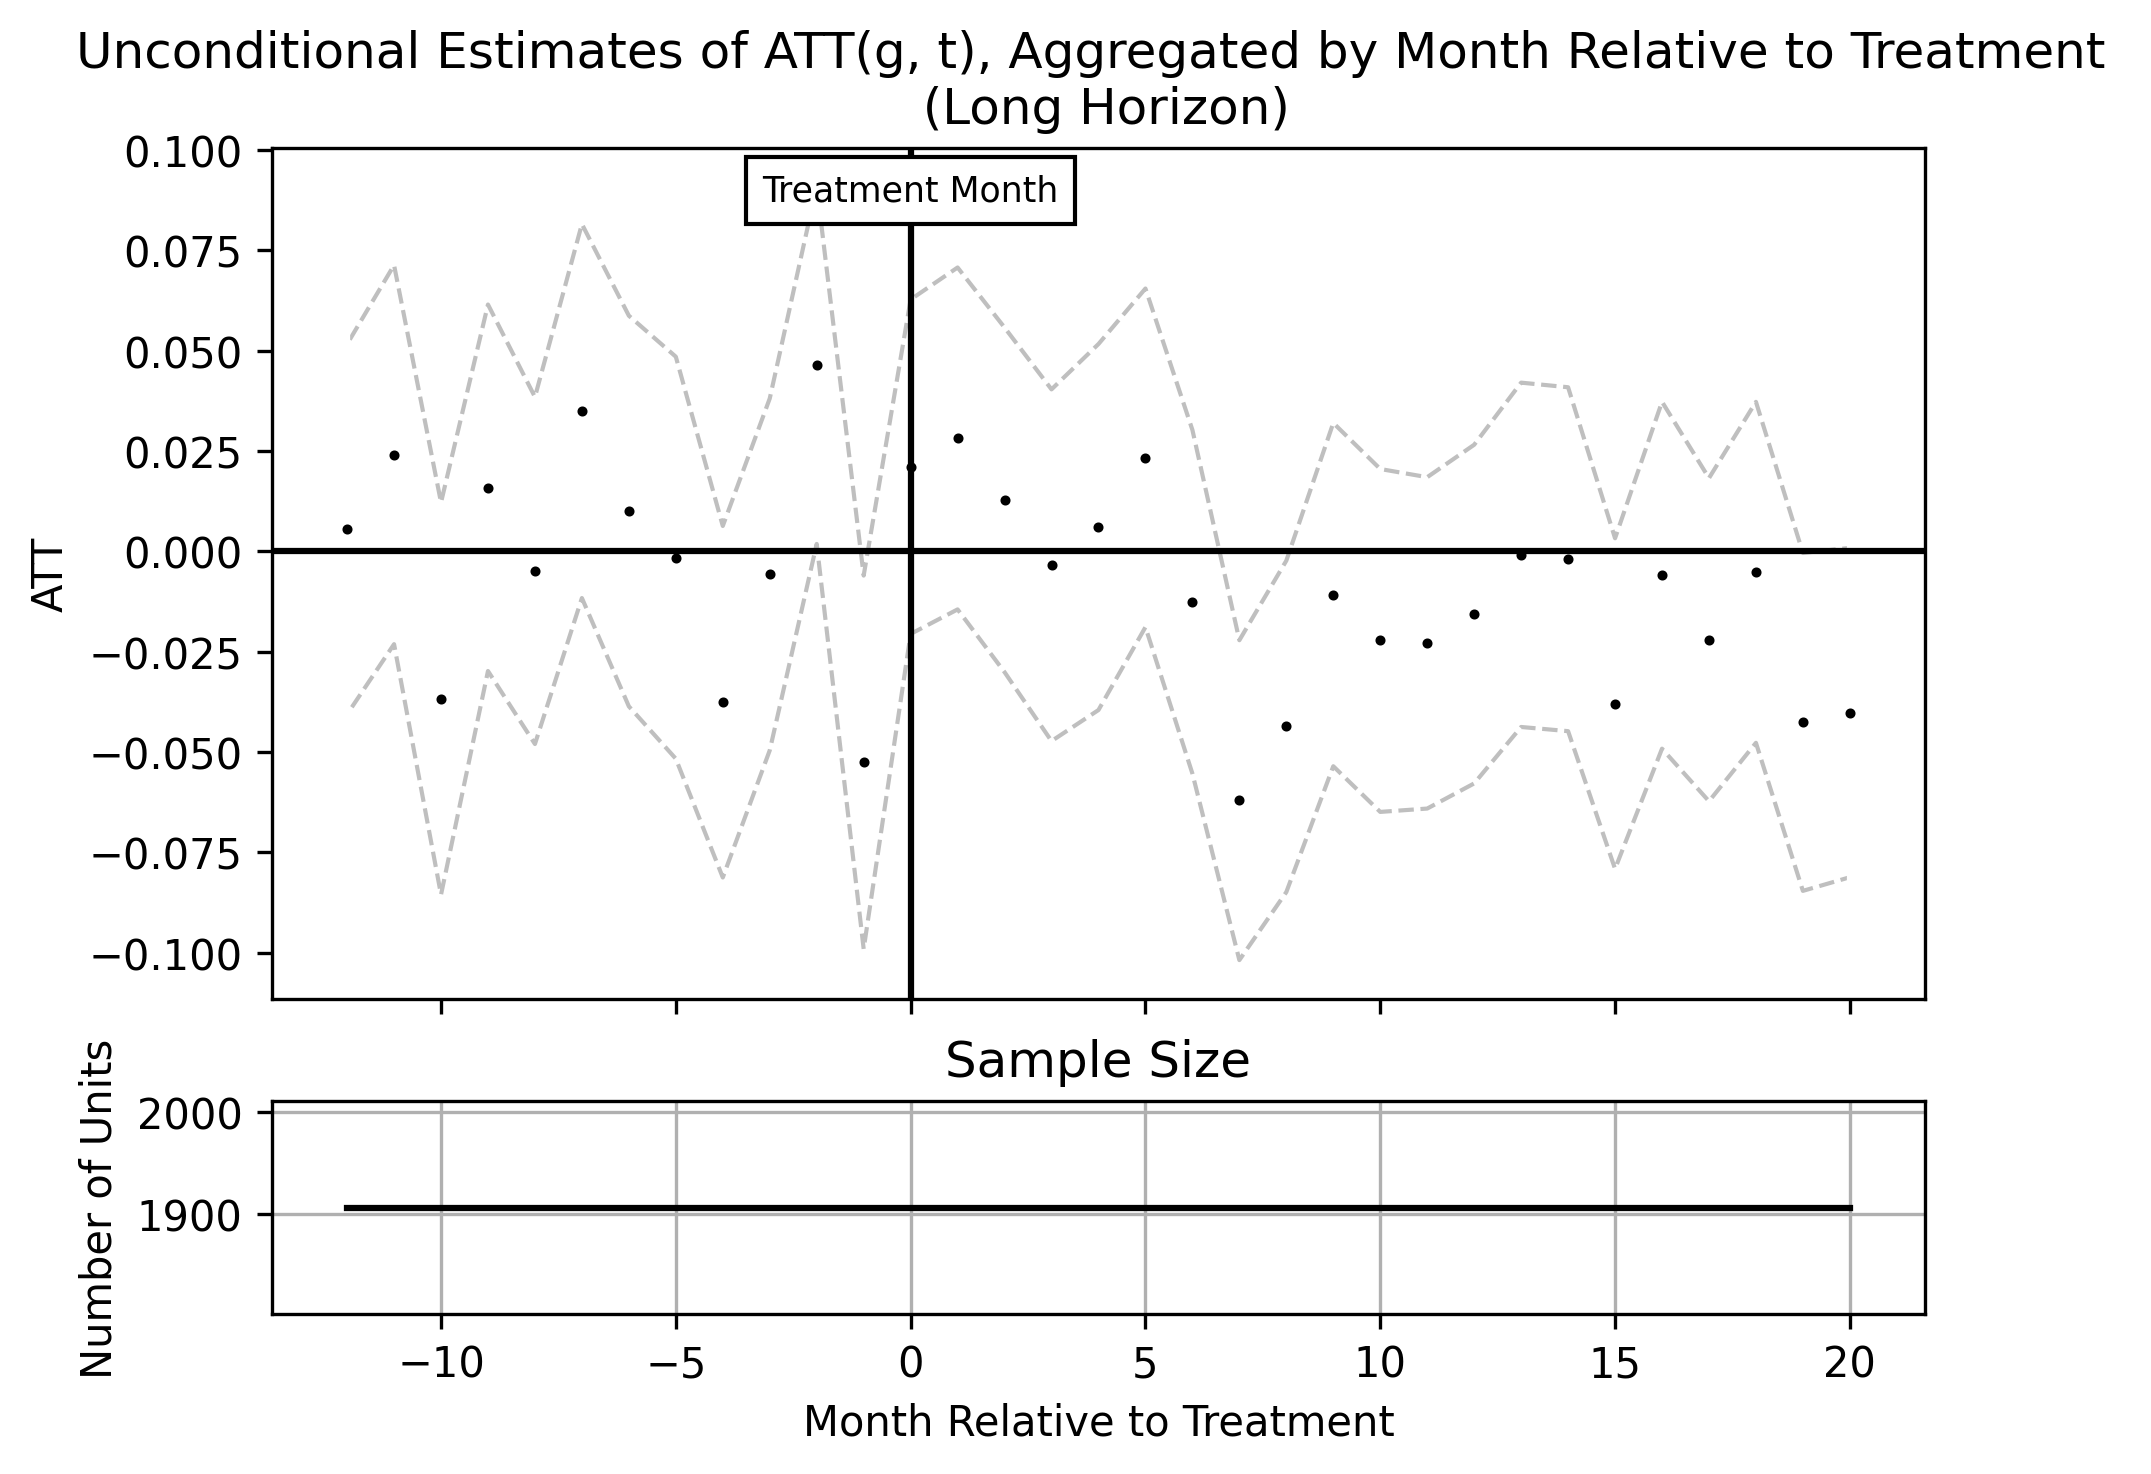

In [16]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

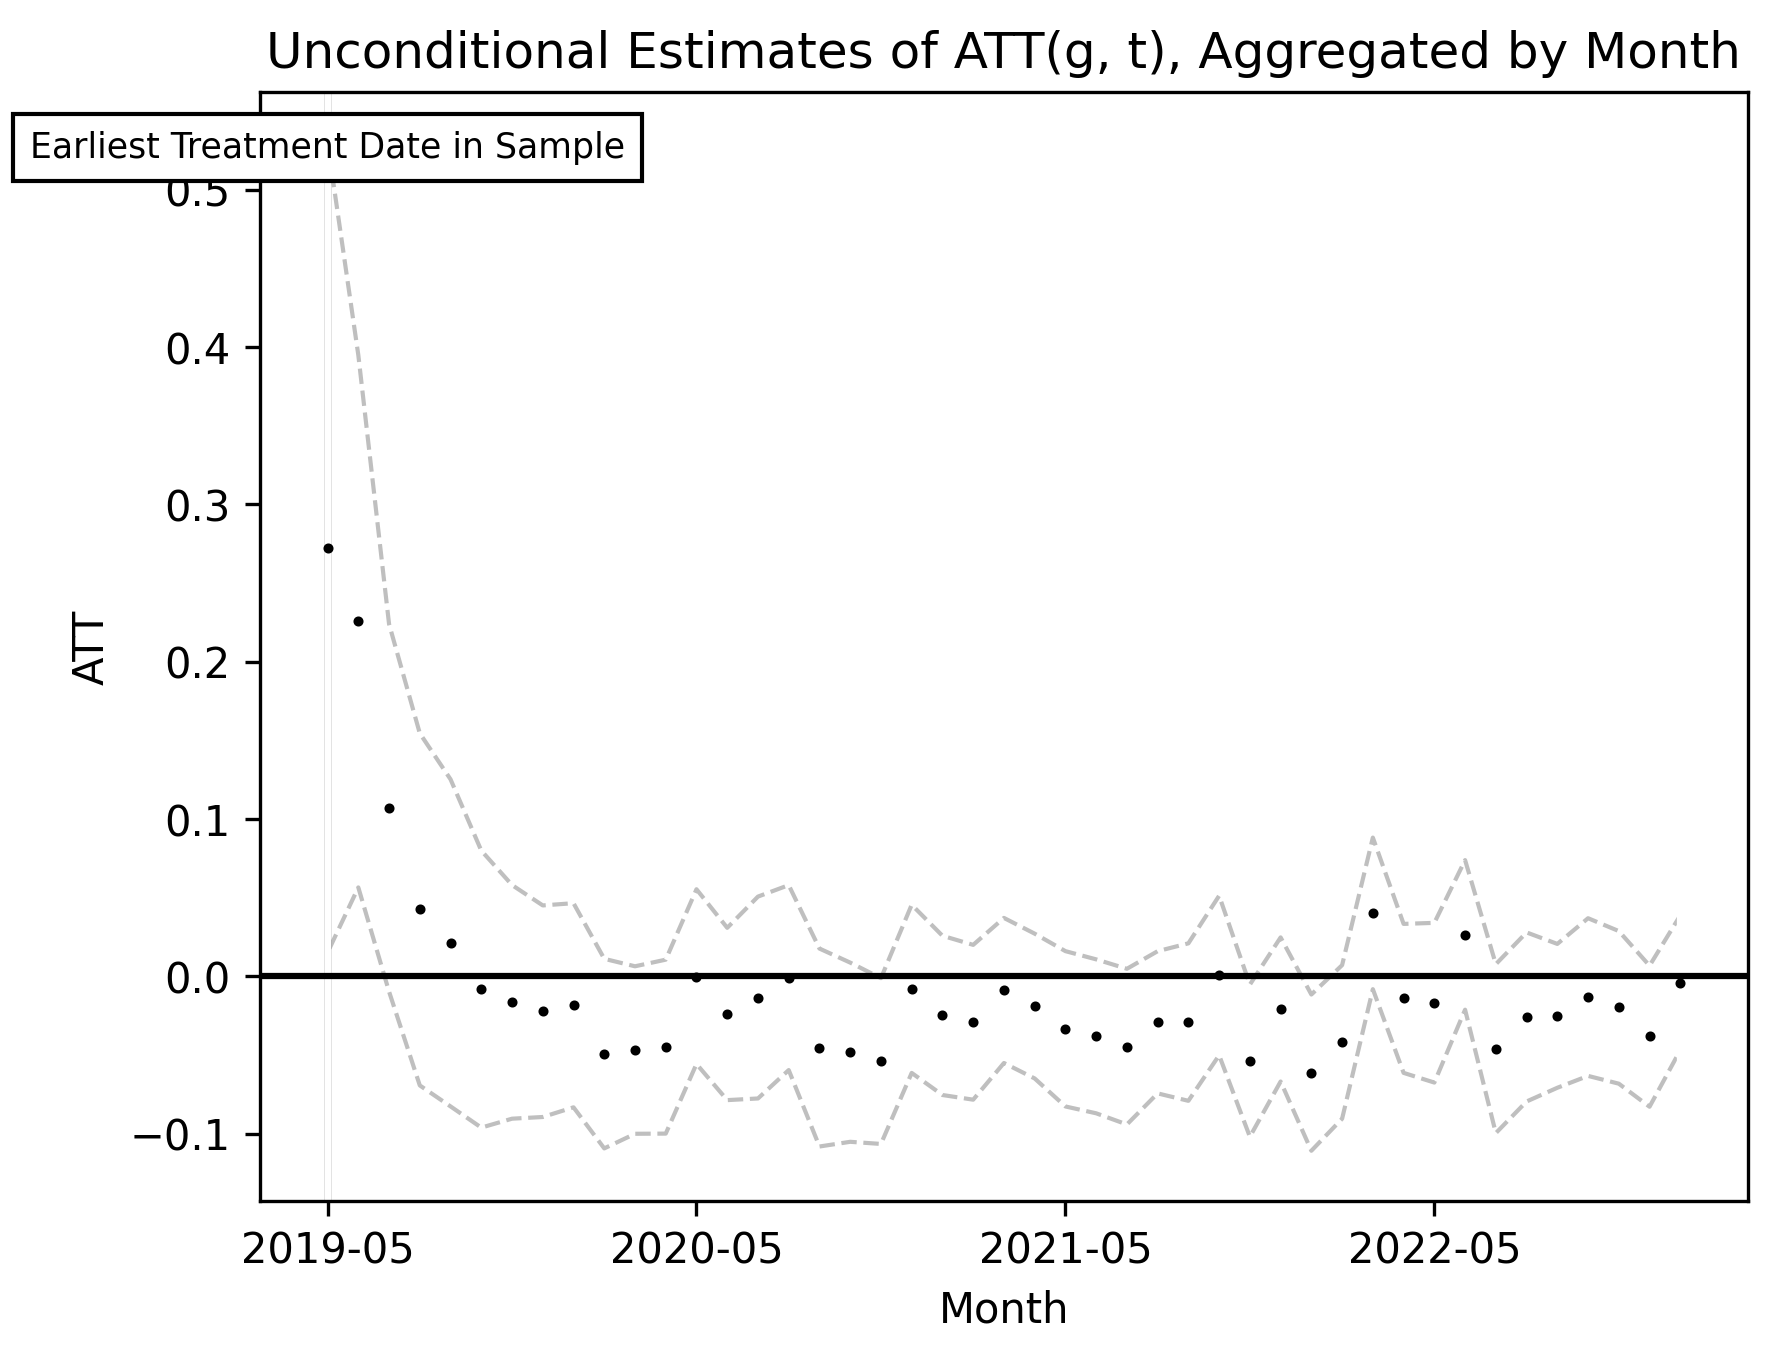

In [17]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [ ]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

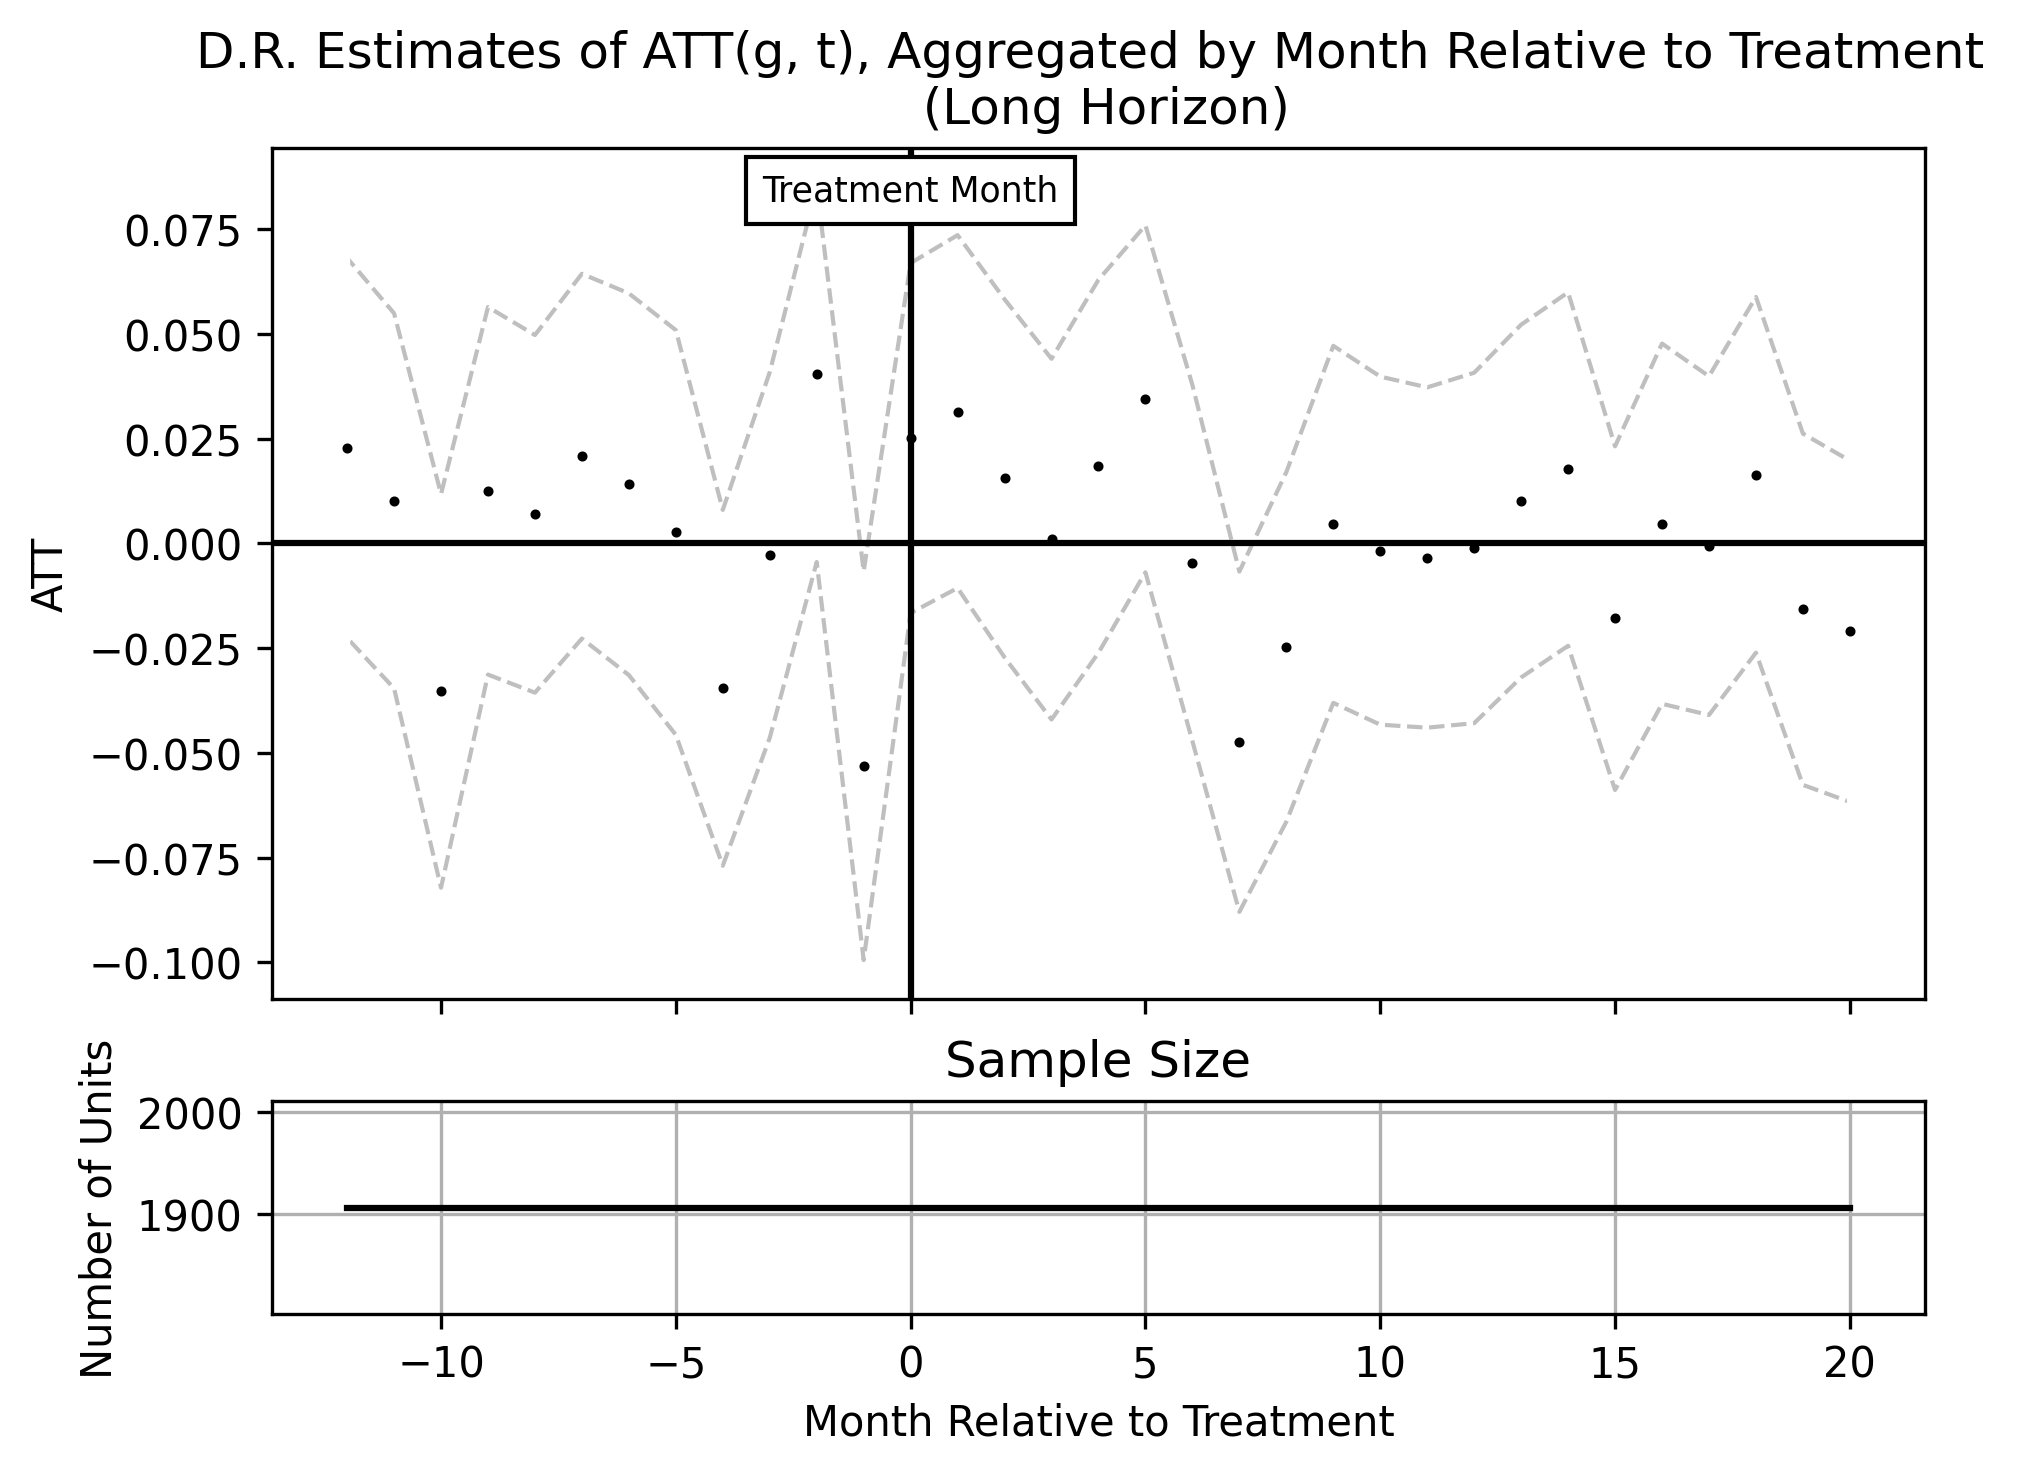

In [19]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

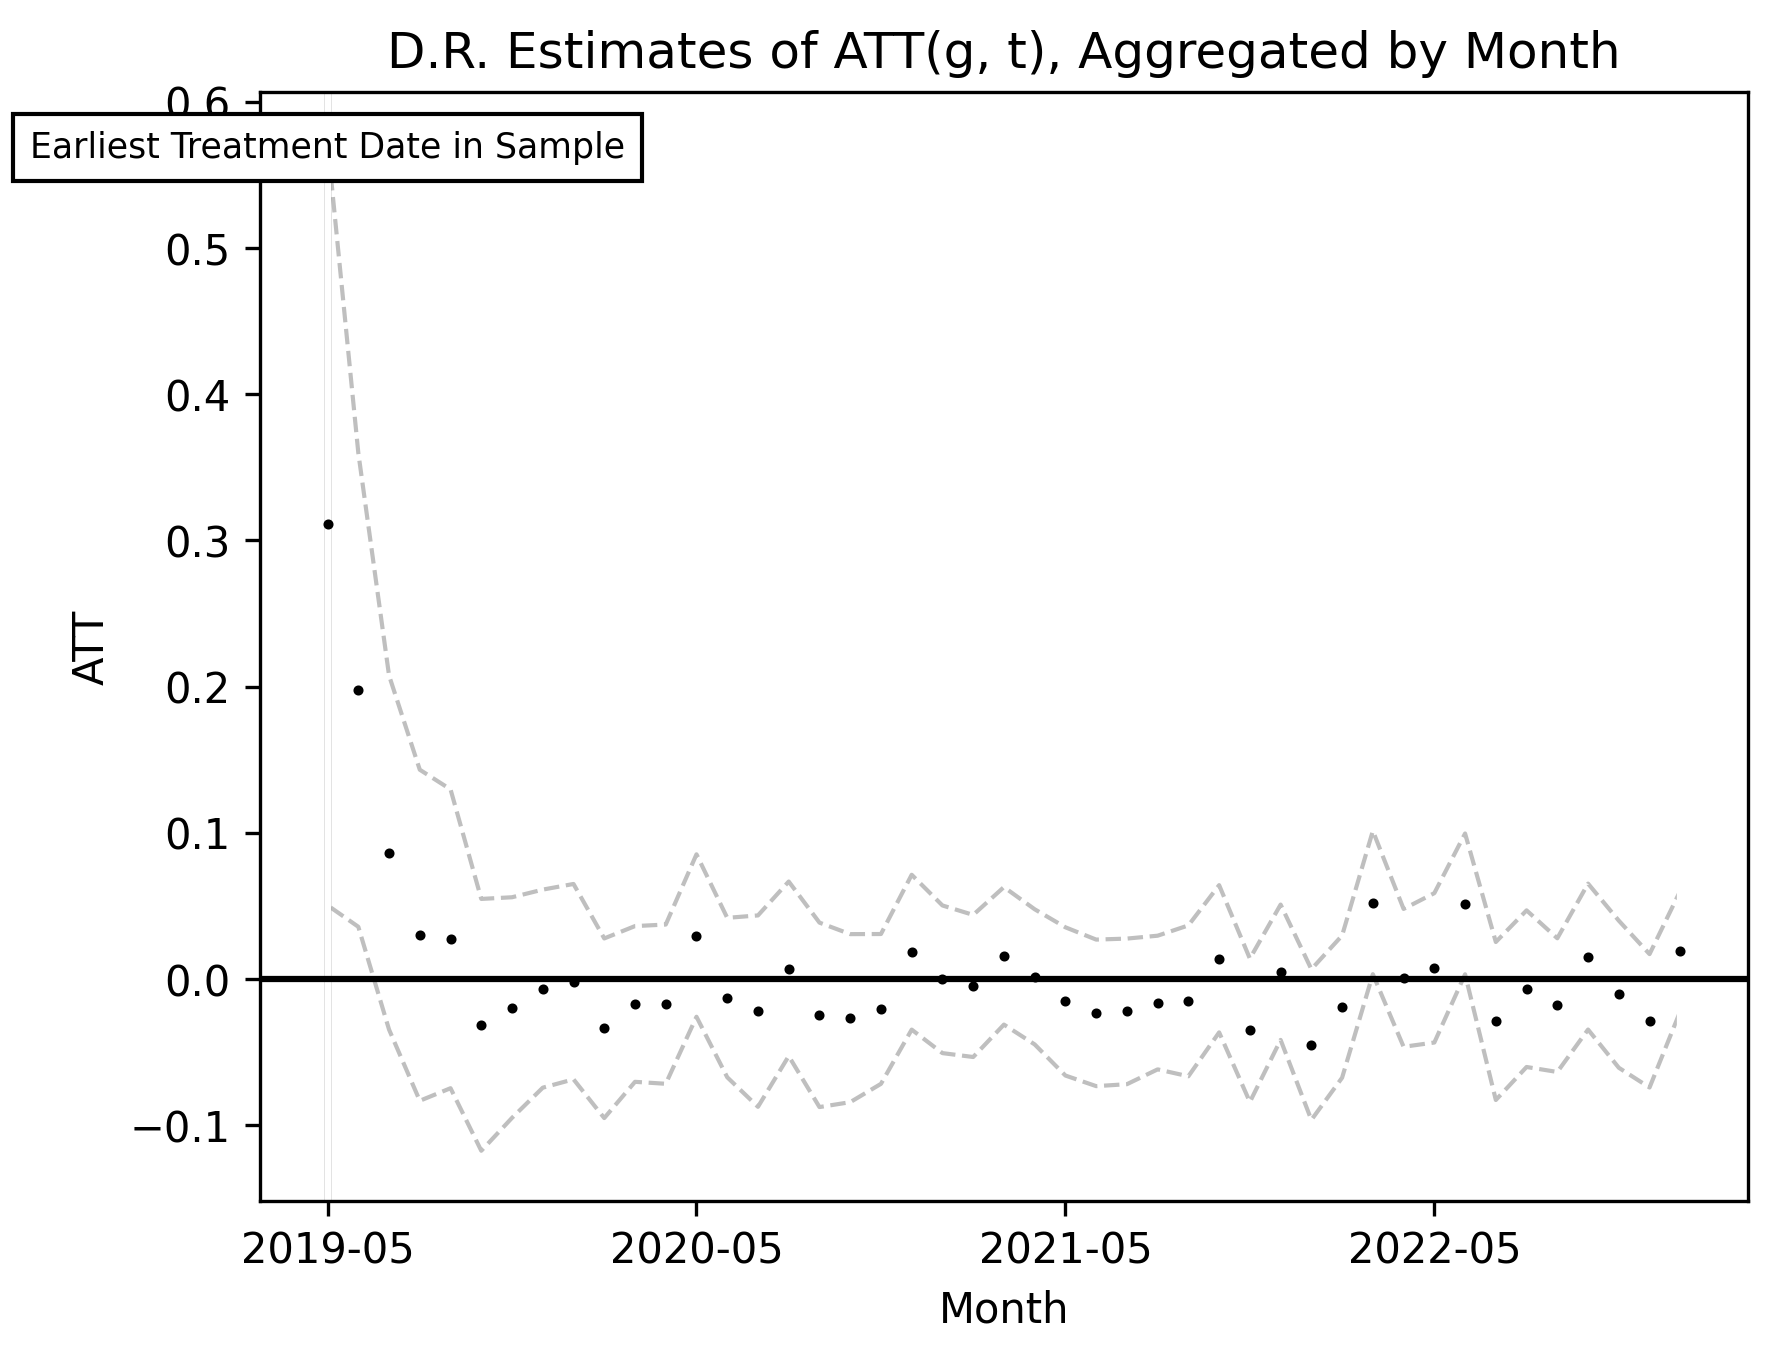

In [20]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")